### Data generation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_regression, make_classification, make_blobs, make_moons

In [ ]:
x, y = make_regression?

In [ ]:
xr, yr = make_regression (n_samples=400, n_features=1, n_informative=1, noise=5)

In [ ]:
xr.shape, yr.shape 

((400, 1), (400,))

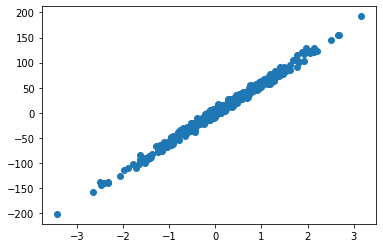

In [ ]:
plt.scatter(xr,yr)
plt.show()

In [ ]:
xc, yc = make_classification (n_samples=400, n_features=2, n_classes=3, 
                              n_clusters_per_class=1, n_informative=2, n_redundant=0)

In [ ]:
print(xc.shape, yc.shape)
print(np.unique(yc))


(400, 2) (400,)
[0 1]


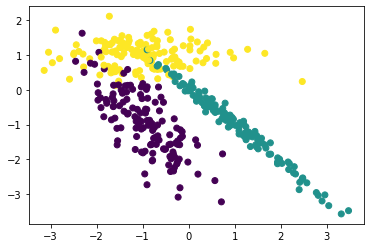

In [ ]:
plt.scatter(xc[:, 0] , xc[:, 1], c = yc)
plt.show()

### KNN

KNN (k nearest neighbors classification)
 
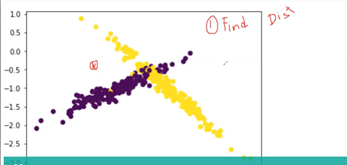

For any point x , we 

1.	Calculate distance from all the points
Gaussian distance is maths coordinate system dist sqrt( (x1-x2)2 + (y1-y2)2 )
Manhattan dist is  ( abs(x1-x2) + abs (y1-y2) )


2.	Find K distance that are close to this point, generally choose k as Odd but also prefer it as prime. So like 7 chosen, and 3 are yellow 4 are purple so it will be classified as purple


In [ ]:
x, y = make_classification (n_samples=400, n_features=2, n_classes=2,
                            n_clusters_per_class=1, n_informative=2,
                            n_redundant = 0)
x.shape, y.shape, y[:10]

((400, 2), (400,), array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1]))

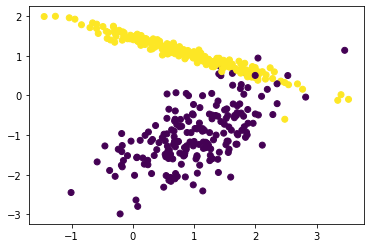

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c = y)
plt.show()

In [ ]:
# not req
xp = pd.DataFrame(x)
yp = pd.DataFrame(y)
xp.columns = ['x1', 'x2']
yp.columns = ['target']
print( xp.head(10) )
print(yp.head(10))

         x1        x2
0  0.842737 -1.506542
1  0.442286  1.294426
2  2.414423  0.359879
3  1.572507  0.764582
4  1.962017 -0.703800
5  0.723743 -2.044015
6  1.473868  0.763208
7  0.525921 -1.487624
8  2.005781  0.627633
9  0.644170  1.078568
   target
0       0
1       1
2       1
3       1
4       0
5       0
6       1
7       0
8       1
9       1


In [ ]:
testing_point = np.array ([1.5,0.5])
testing_point, type(x)

(array([1.5, 0.5]), numpy.ndarray)

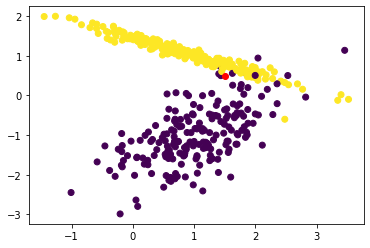

In [ ]:
plt.scatter(x[:,0], x[:,1], c=y[:])
plt.scatter(testing_point[0], testing_point[1], c = "red")
plt.show()

In [ ]:
def distance (x1, x2):
  return np.sqrt( sum( (x1-x2)**2 ) )

print(testing_point, x[0])
print(testing_point - x[0])
print((testing_point - x[0])**2)
print(sum((testing_point - x[0])**2))
print(distance(testing_point, x[0]))


[1.  0.5] [ 0.84273715 -1.50654206]
[0.15726285 2.00654206]
[0.0247316  4.02621104]
4.050942642607796
2.012695367562562


In [ ]:
K = 7 # odd and prime

dist_values = []
for i in range(x.shape[0]):
  dist = distance(x[i], testing_point)
  dist_values.append([dist, y[i]])

print(dist_values [:10])
dist_values.sort()    # sorted by 1st element so no scene
print(dist_values [:10])

k_vals = dist_values[:K]
print(type(k_vals))
k_vals = np.array(k_vals)

print(k_vals)

new_val = np.unique(k_vals[:,1], return_counts=True)
# passed the target column and returned their counts
print("new_val", new_val)

index = new_val[1].argmax() #gives the index of element with max val
print("Index: ", index)

ans = new_val[0][index]
print("Answer: ", ans)

[[2.1114463033349073, 0], [1.3228275054256147, 1], [0.9250958407678508, 1], [0.2743368378661448, 1], [1.2894162384370342, 0], [2.659809443342445, 0], [0.26450225036774094, 1], [2.213476473688558, 0], [0.5216367591706137, 1], [1.0330473531944206, 1]]
[[0.06446090206816357, 0], [0.10692961951372178, 0], [0.11087992124637686, 1], [0.13564539703671866, 0], [0.18844929492684095, 1], [0.20435356980300529, 1], [0.20961062575614642, 1], [0.22268504220475357, 1], [0.22984366498545236, 1], [0.23479733331548472, 1]]
<class 'list'>
[[0.0644609  0.        ]
 [0.10692962 0.        ]
 [0.11087992 1.        ]
 [0.1356454  0.        ]
 [0.18844929 1.        ]
 [0.20435357 1.        ]
 [0.20961063 1.        ]]
new_val (array([0., 1.]), array([3, 4]))
Index:  1
Answer:  1.0


complexity :-

sort = nlogn

no of points to tested = t

=> knn = O( tnlog(n) )

In [ ]:
#############################################################################3

# Making a knn function out of above code 


def KNN (x, y, testing_point, k=7):
  
  plt.scatter(x[:,0], x[:,1], c=y[:])
  plt.scatter(testing_point[0], testing_point[1], c = "red")
  plt.show()

  dist_values = []
  for i in range(x.shape[0]):
    dist = distance(x[i], testing_point)
    dist_values.append([dist, y[i]])

  dist_values.sort()    
  k_vals = dist_values[:K]
  k_vals = np.array(k_vals)

  new_val = np.unique(k_vals[:,1], return_counts=True)
  
  index = new_val[1].argmax() 
  ans = new_val[0][index]

  return ans

#############################################################################3

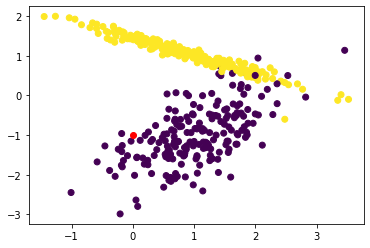

0.0


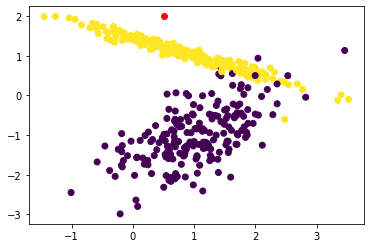

1.0


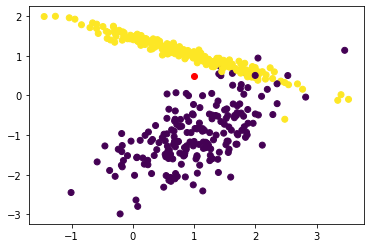

1.0


In [ ]:
print (KNN (x,y, [0,-1]))
print (KNN (x,y, [0.5, 2]))
print (KNN (x,y, [1,0.5]))